# Iris Dataset 

Iris dataset is a typical machine learning classification problem. There are three species of Iris flower. When a new flower is given, we need to predict it belongs to which type. Following figure shows the samples of all three species  


How to extract features from these flowers is a critical step. But, we don't have to do it by image processing. Some numeric measurements are given in ** Iris Datasets **

## For Vinil Understanding

In [17]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import load_iris
sns.set(style="white", color_codes=True)

In [12]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [13]:
# df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
df = pd.DataFrame(iris['data'], columns = ['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width'])
df['target'] = pd.Series(iris['target'], name = 'target_values')
df['Species'] = df['target'].replace([0,1,2],[species for species in iris['target_names'].tolist()])

In [14]:
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,target,Species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [15]:
df["Species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

### Scatter Plot 

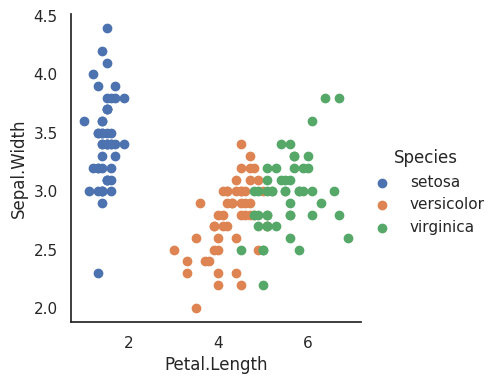

In [16]:
sns.FacetGrid(df, hue="Species",height=4).map(plt.scatter, "Petal.Length", "Sepal.Width").add_legend()

# Logistic Regression

#### Converting categorical varibales into numbers

In [5]:
flower_mapping = {'setosa': 0,'versicolor': 1,'virginica':2}
iris["Species"] = iris["Species"].map(flower_mapping)

In [6]:
iris.head()

,ID,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


### Preparing inputs and outputs 

In [ ]:
# x = training data without label
# y = label of all data

In [107]:
X=df[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']].values
y=df[['target']].values 

# Logistic Regression 

In [108]:
from sklearn.linear_model import LogisticRegression

In [109]:
model = LogisticRegression()

In [110]:
model.fit(X, y)

LogisticRegression()

### Accuracy 

In [111]:
model.score(X,y)

0.9733333333333334

#### Make Predictions

In [112]:
expected = y
predicted = model.predict(X)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### summarize the fit of the model

In [113]:
from sklearn import metrics

In [114]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [115]:
# please write here
print(metrics.confusion_matrix(expected, predicted))

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


In [9]:
metric_data = [[50,'versicolor','virginica'],['setosa',47,3],['setosa',1,49]]
print(metric_data[0])
print(metric_data[1])
print(metric_data[2])

[50, 'versicolor', 'virginica']
['setosa', 47, 3]
['setosa', 1, 49]
